In [1]:
# Read the jun 2012 power data from the data folder.
import pandas as pd
df = pd.read_csv("../data/2012-06-power-survey-london.csv")

In [2]:
df.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,M_count,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std
0,2012-06-01 00:00:00,17.777,0.765,7.614,29.935,126.537,47.498,9.005,27.533,1.598,...,46,71,44,68,521,18,2940,391.070,0.133017,0.161264
1,2012-06-01 00:30:00,17.506,0.872,7.184,25.912,131.720,41.897,8.174,22.699,1.566,...,46,71,44,68,521,18,2943,397.867,0.135191,0.213922
2,2012-06-01 01:00:00,16.350,0.851,6.478,25.622,114.753,40.914,7.299,20.513,2.112,...,46,71,44,68,521,18,2943,360.190,0.122389,0.183756
3,2012-06-01 01:30:00,14.346,0.807,5.959,23.885,102.032,41.101,7.358,19.862,1.569,...,46,71,44,68,521,18,2943,322.754,0.109668,0.150751
4,2012-06-01 02:00:00,14.358,0.674,5.723,23.187,95.854,37.432,7.097,19.033,1.652,...,46,71,44,68,521,18,2943,304.610,0.103503,0.134089


In [3]:
from datetime import datetime
#type(df['datetime'][0])
#date_time_obj = datetime.strptime(df['datetime'][0], "%m/%d/%Y %H:%M")

# Create two functions that will allow us to create data based on the data in each row.

def dayCalc(row):
    return pd.to_datetime(row['datetime']).day

def tstampCalc(row):
    return f"{pd.to_datetime(row['datetime']).hour}:{pd.to_datetime(row['datetime']).minute:02}"
    
# Create new columns for the day of the month and also a column for the time stamp (e.g. 20:30).

df['day'] = df.apply(dayCalc, axis = 1)
df['tstamp'] = df.apply(tstampCalc, axis = 1)

# Could also do it with a lambda.
#df['day'] = pd.to_datetime(df['datetime'])
#df['day'] = df.apply(lambda row: pd.to_datetime(row['datetime']).day, axis = 1)

In [4]:
# Create a dataframe representing energy consumption for February 11th 2012, the day
# of the England vs. Italy game.

df_France_England = df.loc[df['day']==11]
df_France_England = df_France_England.set_index(df_France_England["tstamp"])
df_France_England.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-06-11 00:00:00,18.588,0.900,7.647,29.654,133.702,54.180,11.412,24.568,2.016,...,50,67,554,19,3131,409.232001,0.130703,0.165778,11,0:00
0:30,2012-06-11 00:30:00,17.902,0.955,6.729,27.774,140.936,51.892,10.268,23.208,1.892,...,50,68,554,19,3133,438.163000,0.139854,0.236837,11,0:30
1:00,2012-06-11 01:00:00,15.728,0.820,6.185,25.887,127.798,45.207,9.445,22.378,1.668,...,50,68,554,19,3133,390.445000,0.124623,0.211583,11,1:00
1:30,2012-06-11 01:30:00,14.672,0.925,5.779,24.339,118.389,43.543,9.397,21.580,1.996,...,50,68,554,19,3133,354.512000,0.113154,0.180949,11,1:30
2:00,2012-06-11 02:00:00,13.951,0.791,5.446,25.034,109.371,40.311,8.879,21.068,2.088,...,50,68,554,19,3133,329.545000,0.105185,0.162444,11,2:00


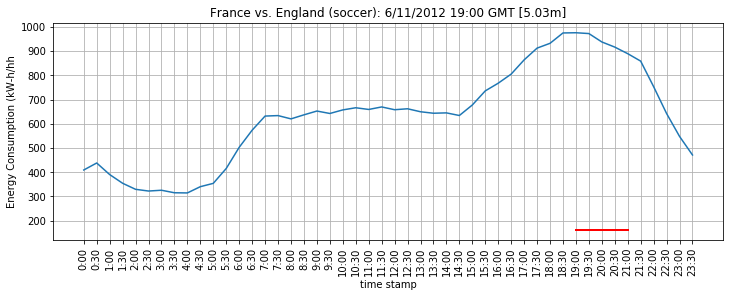

In [5]:
# Plot the day's energy consumption.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_France_England["tstamp"],df_France_England["sigma"])
plt.xticks(rotation='vertical')
plt.title("France vs. England (soccer): 6/11/2012 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '21:00'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.show()

In [6]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_France_England["A_sigma"] + df_France_England["B_sigma"] + df_France_England["C_sigma"]
Acorn2  = df_France_England["D_sigma"] + df_France_England["E_sigma"]
Acorn3  = df_France_England["F_sigma"] + df_France_England["G_sigma"] + df_France_England["H_sigma"] \
                                           + df_France_England["I_sigma"] + df_France_England["J_sigma"]
Acorn4  = df_France_England["K_sigma"] + df_France_England["L_sigma"] + df_France_England["M_sigma"] \
                                           + df_France_England["N_sigma"]
Acorn5  = df_France_England["O_sigma"] + df_France_England["P_sigma"] + df_France_England["Q_sigma"]

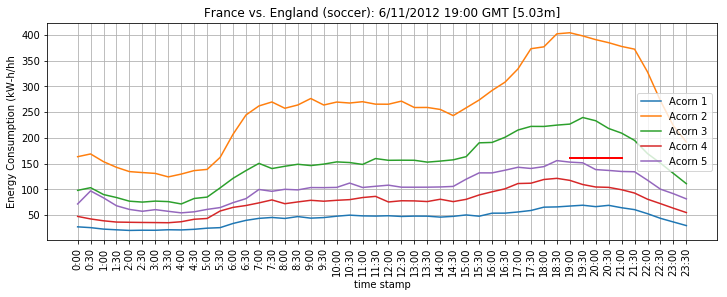

In [7]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_France_England["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_France_England["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_France_England["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_France_England["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_France_England["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("France vs. England (soccer): 6/11/2012 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '21:00'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [8]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:30']
Acorn2 = Acorn2 / Acorn2['19:30']
Acorn3 = Acorn3 / Acorn3['19:30']
Acorn4 = Acorn4 / Acorn4['19:30']
Acorn5 = Acorn5 / Acorn5['19:30']

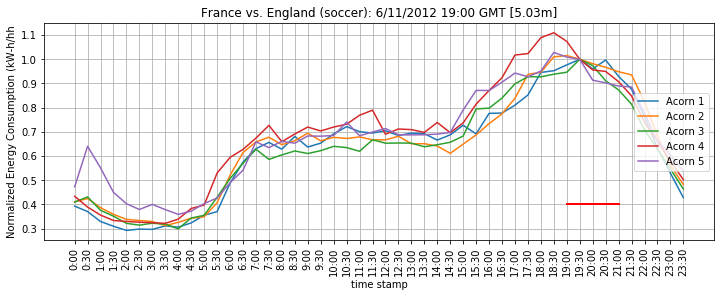

In [9]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_France_England["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_France_England["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_France_England["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_France_England["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_France_England["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("France vs. England (soccer): 6/11/2012 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '21:00'], [0.4, 0.4], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [10]:
# Create a dataframe representing energy consumption for February 4th 2012, the day
# of the England vs. Scotland game.

df_France_England= df.loc[df['day']==11]
df_France_England= df_France_England.set_index(df_France_England["tstamp"])
df_France_England.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-06-11 00:00:00,18.588,0.900,7.647,29.654,133.702,54.180,11.412,24.568,2.016,...,50,67,554,19,3131,409.232001,0.130703,0.165778,11,0:00
0:30,2012-06-11 00:30:00,17.902,0.955,6.729,27.774,140.936,51.892,10.268,23.208,1.892,...,50,68,554,19,3133,438.163000,0.139854,0.236837,11,0:30
1:00,2012-06-11 01:00:00,15.728,0.820,6.185,25.887,127.798,45.207,9.445,22.378,1.668,...,50,68,554,19,3133,390.445000,0.124623,0.211583,11,1:00
1:30,2012-06-11 01:30:00,14.672,0.925,5.779,24.339,118.389,43.543,9.397,21.580,1.996,...,50,68,554,19,3133,354.512000,0.113154,0.180949,11,1:30
2:00,2012-06-11 02:00:00,13.951,0.791,5.446,25.034,109.371,40.311,8.879,21.068,2.088,...,50,68,554,19,3133,329.545000,0.105185,0.162444,11,2:00


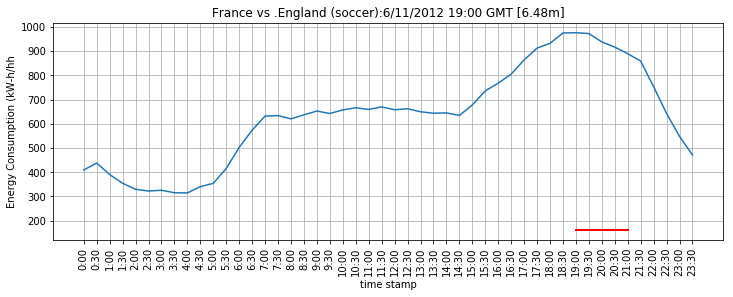

In [12]:
# Create a plotting function.

def eventPlotter(dfx, title, tsb, tse):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(12,4))
    plt.plot(dfx["tstamp"],dfx["sigma"])
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.xlabel("time stamp")
    plt.ylabel("Energy Consumption (kW-h/hh")
    plt.grid()
    plt.plot([tsb, tse], [160, 160], color='r', linestyle='-', linewidth=2)
    plt.show()

# Enter details for the France vs. England game, which took place on day 11
# between 19:00 and 21:00 (approx).

dfevent = df_France_England
title   = "France vs .England (soccer):6/11/2012 19:00 GMT [6.48m]"
tsb     = '19:00'
tse     = '21:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)

In [13]:
# Create a dataframe representing energy consumption for February 25th 2012, the day
# of the France vs. England game.

df_France_England = df.loc[df['day']==11]
df_France_England = df_France_England.set_index(df_France_England["tstamp"])
df_France_England.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-06-11 00:00:00,18.588,0.900,7.647,29.654,133.702,54.180,11.412,24.568,2.016,...,50,67,554,19,3131,409.232001,0.130703,0.165778,11,0:00
0:30,2012-06-11 00:30:00,17.902,0.955,6.729,27.774,140.936,51.892,10.268,23.208,1.892,...,50,68,554,19,3133,438.163000,0.139854,0.236837,11,0:30
1:00,2012-06-11 01:00:00,15.728,0.820,6.185,25.887,127.798,45.207,9.445,22.378,1.668,...,50,68,554,19,3133,390.445000,0.124623,0.211583,11,1:00
1:30,2012-06-11 01:30:00,14.672,0.925,5.779,24.339,118.389,43.543,9.397,21.580,1.996,...,50,68,554,19,3133,354.512000,0.113154,0.180949,11,1:30
2:00,2012-06-11 02:00:00,13.951,0.791,5.446,25.034,109.371,40.311,8.879,21.068,2.088,...,50,68,554,19,3133,329.545000,0.105185,0.162444,11,2:00


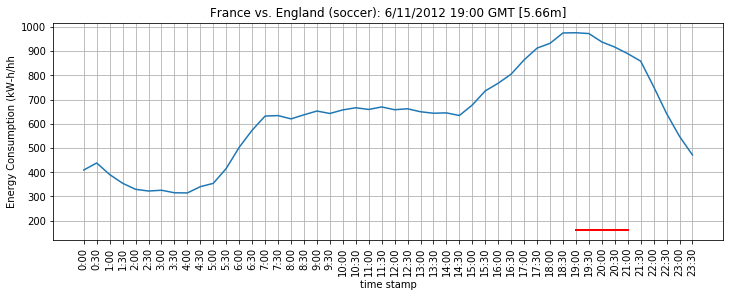

In [14]:
# Enter details for the England vs. Wales game, which took place on day 11
# between 19:00 and 21:00 (approx).

dfevent = df_France_England
title   = "France vs. England (soccer): 6/11/2012 19:00 GMT [5.66m]"
tsb     = '19:00'
tse     = '21:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)